## Lab # 3
_Tream 5_ <br>
_Kozlyak Ruslan, Shmelev Egor, Vysotskiy Roman_

##### <b> 3 algorithms and models from previous lab </b>

**We use the following dataset**

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds. There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

Models:

- Linear
- Polynomial
- Bayesian

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r'/content/Diamonds Prices2022.csv', index_col=0)
data = data.sample(frac=0.1, random_state=0)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
34666,0.31,Ideal,E,VS2,61.7,56.0,872,4.35,4.31,2.67
36942,0.34,Very Good,F,SI2,60.6,58.0,478,4.55,4.57,2.76
14974,1.57,Premium,J,SI2,59.6,56.0,6031,7.59,7.50,4.50
19892,1.20,Ideal,G,VS1,62.3,56.0,8442,6.77,6.82,4.23
41071,0.46,Ideal,I,IF,62.2,55.0,1192,4.94,4.97,3.08
...,...,...,...,...,...,...,...,...,...,...
9001,0.91,Very Good,E,SI1,62.5,61.0,4512,6.10,6.19,3.84
8221,1.06,Very Good,H,SI2,62.8,57.0,4372,6.49,6.57,4.10
20407,1.51,Very Good,J,VVS2,62.9,58.0,8770,7.21,7.33,4.57
53548,0.75,Very Good,F,SI1,63.7,58.0,2693,5.73,5.77,3.66


In [3]:
# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).drop(['price'], axis=1).columns
categorical_features = ['cut', 'color', 'clarity']

# Scale the data and OHE
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [4]:
# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)
X = X_preprocessed.copy()

print(f'Feature shape: {X_preprocessed.shape}')
print(f'Target shape: {y.shape}')

Feature shape: (5394, 26)
Target shape: (5394,)


In [5]:
# Initialize models
from sklearn.linear_model import Ridge

linear_model = LinearRegression()
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

bayesian_model = BayesianRidge()

## <b> 2 experimental configuration: (1) split train/test 1 time, (2) make 10*10-folded CV </b>

In [6]:
# Experimental Configuration 1: Split the data into training and test sets once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Train and evaluate the linear model using the train/test split
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse_test = mean_squared_error(y_test, linear_predictions)

# Train and evaluate the polynomial model using the train/test split
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
poly_mse_test = mean_squared_error(y_test, poly_predictions)

# Train and evaluate the Bayesian model using the train/test split
bayesian_model.fit(X_train, y_train)
bayesian_predictions = bayesian_model.predict(X_test)
bayesian_mse_test = mean_squared_error(y_test, bayesian_predictions)

In [7]:
# Experimental Configuration 2: 10x10-fold Cross-Validation
# Evaluate models using 10x10-fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0)

cross_val_score_linear = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
cross_val_score_poly = cross_val_score(poly_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
cross_val_score_bayesian = cross_val_score(bayesian_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

linear_mse_cv = -1 * cross_val_score_linear.mean()
poly_mse_cv = -1 * cross_val_score_poly.mean()
bayesian_mse_cv = -1 * cross_val_score_bayesian.mean()

In [8]:
print(f"Linear Model Test RMSE: {round(np.sqrt(linear_mse_test),2)}")
print(f"Polynomial Model Test RMSE: {round(np.sqrt(poly_mse_test),2)}")
print(f"Bayesian Model Test RMSE: {round(np.sqrt(bayesian_mse_test),2)}")
print('--------------------------------------------')

print("\nCross-Validation RMSE Scores:")
print(f"Linear Model CV RMSE: {round(np.sqrt(linear_mse_cv),2)}")
print(f"Polynomial Model CV RMSE: {round(np.sqrt(poly_mse_cv),2)}")
print(f"Bayesian Model CV RMSE: {round(np.sqrt(bayesian_mse_cv),2)}")

Linear Model Test RMSE: 1054.15
Polynomial Model Test RMSE: 664.01
Bayesian Model Test RMSE: 1054.07
--------------------------------------------

Cross-Validation RMSE Scores:
Linear Model CV RMSE: 1124.49
Polynomial Model CV RMSE: 760.75
Bayesian Model CV RMSE: 1121.81


**Several observations can be made:**

- **Linear Model:** Shows almost similar RMSE score for both test data and cross-validation, indicating model stability.

- **Polynomial Model**: Offers the best performance of the three models. Given the close RMSE scores between test and CV, it indicates that the model is capturing the underlying pattern without overfitting, which is a desirable outcome.

- **Bayesian Model:** Results are similar to the linear model, suggesting that the Bayesian approach did not significantly improve performance in this case.

**Overall Conclusion:** The polynomial model appears to be the most suitable for this dataset, achieving the lowest RMSE scores in both test and cross-validation scenarios, suggesting it has successfully captured the complexity of the data without overfitting. The consistency between the test and CV results adds confidence to its robustness.

## <b> Paired comparison of 3 models with (1) experimental configuration using sign and sign-ranked tests. Analysis of which model looks better than others </b>

In [9]:
from scipy.stats import binom_test

# Sign Test
def perform_sign_test(predictions_1, predictions_2, true_values):
    # calculate abs errors
    errors_1 = abs(predictions_1 - true_values)
    errors_2 = abs(predictions_2 - true_values)

    # calculate wins and ties
    wins_1 = sum(errors_1 < errors_2)
    wins_2 = sum(errors_2 < errors_1)
    ties = sum(errors_1 == errors_2)

    # calculate p_value
    p_value = binom_test(wins_1, wins_1 + wins_2, 0.5, alternative='two-sided')

    return wins_1, wins_2, ties, p_value

linear_vs_poly = perform_sign_test(linear_predictions, poly_predictions, y_test)
linear_vs_bayesian = perform_sign_test(linear_predictions, bayesian_predictions, y_test)
poly_vs_bayesian = perform_sign_test(poly_predictions, bayesian_predictions, y_test)

# Results
print('Sign Test:\n')
print(f'Linear vs. Polynomial: \nWins: {linear_vs_poly[0]}, \nLosses: {linear_vs_poly[1]}, \nTies: {linear_vs_poly[2]}, \np-value: {linear_vs_poly[3]}')
print(f'\nLinear vs. Bayesian: \nWins: {linear_vs_bayesian[0]}, \nLosses: {linear_vs_bayesian[1]}, \nTies: {linear_vs_bayesian[2]}, \np-value: {linear_vs_bayesian[3]}')
print(f'\nPolynomial vs. Bayesian: \nWins: {poly_vs_bayesian[0]}, \nLosses: {poly_vs_bayesian[1]}, \nTies: {poly_vs_bayesian[2]}, \np-value: {poly_vs_bayesian[3]}')


Sign Test:

Linear vs. Polynomial: 
Wins: 136, 
Losses: 404, 
Ties: 0, 
p-value: 7.440334168310885e-32

Linear vs. Bayesian: 
Wins: 275, 
Losses: 265, 
Ties: 0, 
p-value: 0.6985730835982428

Polynomial vs. Bayesian: 
Wins: 404, 
Losses: 136, 
Ties: 0, 
p-value: 7.440334168310885e-32


<ipython-input-9-ce8687a3a44d>:15: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(wins_1, wins_1 + wins_2, 0.5, alternative='two-sided')


- **Linear vs. Polynomial**: The polynomial model outperforms the linear model significantly, as indicated by the high number of wins and a very low p-value, suggesting a statistically significant difference in performance in favor of the polynomial model

- **Linear vs. Bayesian**: The performance difference between the linear and Bayesian models is not statistically significant, with the p-value being higher than the typical alpha level of 0.05.

- **Polynomial vs. Bayesian**: The polynomial model significantly outperforms the Bayesian model, as shown by a large number of wins and a very low p-value, pointing to a statistically significant difference in performance. Earlier we saw the lowest value of RMSE during CV, so it is not surprise.

In [10]:
from scipy.stats import wilcoxon

diff_linear_poly = linear_predictions - poly_predictions
diff_linear_bayesian = linear_predictions - bayesian_predictions
diff_poly_bayesian = poly_predictions - bayesian_predictions

test_statistic, p_value = wilcoxon(diff_linear_poly)
print(f'Linear vs. Polynomial: \nTest Statistic = {test_statistic}, \np-value = {p_value}')

test_statistic, p_value = wilcoxon(diff_linear_bayesian)
print(f'\nLinear vs. Bayesian: \nTest Statistic = {test_statistic}, \np-value = {p_value}')

test_statistic, p_value = wilcoxon(diff_poly_bayesian)
print(f'\nPolynomial vs. Bayesian: \nTest Statistic = {test_statistic}, \np-value = {p_value}')


Linear vs. Polynomial: 
Test Statistic = 59780.0, 
p-value = 0.000258114740322996

Linear vs. Bayesian: 
Test Statistic = 69104.0, 
p-value = 0.2785075396976041

Polynomial vs. Bayesian: 
Test Statistic = 59766.0, 
p-value = 0.0002542599177023755


- **Linear vs. Polynomial**: statistical significance.

- **Linear vs. Bayesian**:  The high p-value indicates there is no statistically significant difference in the performance of the linear and Bayesian models.

- **Polynomial vs. Bayesian**: statistical significance.

**Polynomial model** demonstrates superior performance on the test set, as indicated by the lowest Root Mean Square Error (RMSE) among the evaluated models. The substantially lower test RMSE for the polynomial model suggests that it can capture the complexity of the data better than the linear or Bayesian models.

Moreover, the sign test results reinforce the notion that the polynomial model outperforms the linear and Bayesian models with a significant number of wins and extremely low p-values, indicating that the performance differences are statistically significant.

## <b> Paired comparison of 3 algorithms with (2) experimental configuration using unmodified paired t-test, modified paired t-test, sign-ranked test, bayesian sign-ranked test. Adding one of post-hoc procedures in 1*N mode </b>


###### Bayesian sign-ranked test func

In [11]:
LEFT, ROPE, RIGHT = range(3)

import numpy as np
import numpy.matlib

def heaviside(X):
    Y = np.zeros(X.shape);
    Y[np.where(X  > 0)] = 1;
    Y[np.where(X == 0)] = 0.5;
    return Y

def signrank_MC(x, rope, prior_strength=0.6, prior_place=ROPE, nsamples=50000):
    if x.ndim == 2:
        zm = x[:, 1] - x[:, 0]
    else:
        zm = x
    nm=len(zm)
    if prior_place==ROPE:
        z0=[0]
    if prior_place==LEFT:
        z0=[-float('inf')]
    if prior_place==RIGHT:
        z0=[float('inf')]
    z=np.concatenate((zm,z0))
    n=len(z)
    z=np.transpose(np.asmatrix(z))
    X=np.matlib.repmat(z,1,n)
    Y=np.matlib.repmat(-np.transpose(z)+2*rope,n,1)
    Aright = heaviside(X-Y)
    X=np.matlib.repmat(-z,1,n)
    Y=np.matlib.repmat(np.transpose(z)+2*rope,n,1)
    Aleft = heaviside(X-Y)
    alpha=np.concatenate((np.ones(nm),[prior_strength]),axis=0)
    samples=np.zeros((nsamples,3), dtype=float)
    for i in range(0,nsamples):
        data = np.random.dirichlet(alpha, 1)
        samples[i,2]=numpy.inner(np.dot(data,Aright),data)
        samples[i,0]=numpy.inner(np.dot(data,Aleft),data)
        samples[i,1]=1-samples[i,0]-samples[i,2]

    return samples

def bayessian_signrank(x, rope, prior_strength=0.6, prior_place=ROPE, nsamples=50000,
             verbose=False, names=('C1', 'C2')):
    samples = signrank_MC(x, rope, prior_strength, prior_place, nsamples)

    winners = np.argmax(samples, axis=1)
    pl, pe, pr = np.bincount(winners, minlength=3) / len(winners)
    if verbose:
        print('P({c1} > {c2}) = {pl}, P(rope) = {pe}, P({c2} > {c1}) = {pr}'.
              format(c1=names[0], c2=names[1], pl=pl, pe=pe, pr=pr))
    return pl, pe, pr

In [12]:
def plot_posterior(samples, names=('C1', 'C2')):
    return plot_simplex(samples, names)


def plot_simplex(points, names=('C1', 'C2')):
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from matplotlib.pylab import rcParams

    def _project(points):
        from math import sqrt, sin, cos, pi
        p1, p2, p3 = points.T / sqrt(3)
        x = (p2 - p1) * cos(pi / 6) + 0.5
        y = p3 - (p1 + p2) * sin(pi / 6) + 1 / (2 * sqrt(3))
        return np.vstack((x, y)).T

    vert0 = _project(np.array(
        [[0.3333, 0.3333, 0.3333], [0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]]))

    fig = plt.figure()
    fig.set_size_inches(8, 7)

    nl, ne, nr = np.max(points, axis=0)
    for i, n in enumerate((nl, ne, nr)):
        if n < 0.001:
            print("p{} is too small, switching to 2d plot".format(names[::-1] + ["rope"]))
            coords = sorted(set(range(3)) - i)
            return plot2d(points[:, coords], labels[coords])


    fig.gca().add_line(
        Line2D([0, 0.5, 1.0, 0],
               [0, np.sqrt(3) / 2, 0, 0], color='orange'))

    for i in (1, 2, 3):
        fig.gca().add_line(
            Line2D([vert0[0, 0], vert0[i, 0]],
                   [vert0[0, 1], vert0[i, 1]], color='orange'))

    rcParams.update({'font.size': 16})
    fig.gca().text(-0.08, -0.08, 'p({})'.format(names[0]), color='orange')
    fig.gca().text(0.44, np.sqrt(3) / 2 + 0.05, 'p(rope)', color='orange')
    fig.gca().text(1.00, -0.08, 'p({})'.format(names[1]), color='orange')


    tripts = _project(points[:, [0, 2, 1]])
    plt.hexbin(tripts[:, 0], tripts[:, 1], mincnt=1, cmap=plt.cm.Blues_r)

    fig.gca().set_xlim(-0.2, 1.2)
    fig.gca().set_ylim(-0.2, 1.2)
    fig.gca().axis('off')
    return fig

###### t tests funcs

In [13]:
from scipy.stats import ttest_rel, t

def modified_ttest(diff_scores, num_folds=10, num_repeats=10):
    k = num_folds * num_repeats  # Total number of tests
    n = len(diff_scores)  # Number of differences
    mean_diff = np.mean(diff_scores)
    std_diff = np.std(diff_scores, ddof=1)  # Use ddof=1 for sample standard deviation
    se_diff = np.sqrt((1/k + (0.1/0.9)) * (std_diff**2))

    t_statistic = abs(mean_diff / se_diff)

    df = k * n - 1

    p_value = t.sf(t_statistic, df) * 2

    return t_statistic, p_value


###### Experiments

In [14]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=0)

cross_val_score_linear = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1) * -1
cross_val_score_poly = cross_val_score(poly_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1) * -1
cross_val_score_bayesian = cross_val_score(bayesian_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1) * -1

In [15]:
# Perform paired comparison of 3 algorithms using unmodified paired t-test for the second configuration
t_statistic_linear_poly_cv, p_value_linear_poly_cv = ttest_rel(cross_val_score_linear, cross_val_score_poly)
t_statistic_linear_bayesian_cv, p_value_linear_bayesian_cv = ttest_rel(cross_val_score_linear, cross_val_score_bayesian)
t_statistic_poly_bayesian_cv, p_value_poly_bayesian_cv = ttest_rel(cross_val_score_poly, cross_val_score_bayesian)

print(f'Linear vs. Polynomial (Unmodified Paired t-test - CV): t-statistic = {round(t_statistic_linear_poly_cv, 3)}, p-value = {round(p_value_linear_poly_cv, 3)}')
print(f'Linear vs. Bayesian (Unmodified Paired t-test - CV): t-statistic = {round(t_statistic_linear_bayesian_cv, 3)}, p-value = {round(p_value_linear_bayesian_cv, 3)}')
print(f'Polynomial vs. Bayesian (Unmodified Paired t-test - CV): t-statistic = {round(t_statistic_poly_bayesian_cv, 3)}, p-value = {round(p_value_poly_bayesian_cv, 3)}')


Linear vs. Polynomial (Unmodified Paired t-test - CV): t-statistic = 29.503, p-value = 0.0
Linear vs. Bayesian (Unmodified Paired t-test - CV): t-statistic = 1.304, p-value = 0.195
Polynomial vs. Bayesian (Unmodified Paired t-test - CV): t-statistic = -27.292, p-value = 0.0


In [16]:
t_statistic_linear_poly_cv_mod, p_value_linear_poly_cv_mod = modified_ttest(cross_val_score_linear-cross_val_score_poly)
t_statistic_linear_bayesian_cv_mod, p_value_linear_bayesian_cv_mod = modified_ttest(cross_val_score_linear-cross_val_score_bayesian)
t_statistic_poly_bayesian_cv_mod, p_value_poly_bayesian_cv_mod = modified_ttest(cross_val_score_poly-cross_val_score_bayesian)

print(f'Linear vs. Polynomial (Modified Paired t-test - CV): t-statistic = {round(t_statistic_linear_poly_cv_mod, 3)}, p-value = {round(p_value_linear_poly_cv_mod, 3)}')
print(f'Linear vs. Bayesian (Modified Paired t-test - CV): t-statistic = {round(t_statistic_linear_bayesian_cv_mod, 3)}, p-value = {round(p_value_linear_bayesian_cv_mod, 3)}')
print(f'Polynomial vs. Bayesian (Modified Paired t-test - CV): t-statistic = {round(t_statistic_poly_bayesian_cv_mod, 3)}, p-value = {round(p_value_poly_bayesian_cv_mod, 3)}')


Linear vs. Polynomial (Modified Paired t-test - CV): t-statistic = 8.478, p-value = 0.0
Linear vs. Bayesian (Modified Paired t-test - CV): t-statistic = 0.375, p-value = 0.708
Polynomial vs. Bayesian (Modified Paired t-test - CV): t-statistic = 7.842, p-value = 0.0


### The test measures whether the average score differs significantly across samples . In both tests we couln't reject the null hypothesis of identical average scores between the Bayesian and Linear regressions. Different result for other models, we reject null hypothsis - the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages

In [17]:
diff_linear_poly = cross_val_score_linear-cross_val_score_poly
diff_linear_bayesian = cross_val_score_linear-cross_val_score_bayesian
diff_poly_bayesian = cross_val_score_poly-cross_val_score_bayesian

print('Sign-ranked test')
t_statistic_linear_poly_cv_sr, p_value_linear_poly_cv_sr = wilcoxon(diff_linear_poly)
print(f'Linear vs. Polynomial: \nTest Statistic = {t_statistic_linear_poly_cv_sr}, \np-value = {round(p_value_linear_poly_cv_sr, 3)}')

t_statistic_linear_bayesian_cv_sr, p_value_linear_bayesian_cv_sr = wilcoxon(diff_linear_bayesian)
print(f'\nLinear vs. Bayesian: \nTest Statistic = {t_statistic_linear_bayesian_cv_sr}, \np-value = {round(p_value_linear_bayesian_cv_sr, 3)}')

t_statistic_poly_bayesian_cv_sr, p_value_poly_bayesian_cv_sr = wilcoxon(diff_poly_bayesian)
print(f'\nPolynomial vs. Bayesian: \nTest Statistic = {t_statistic_poly_bayesian_cv_sr}, \np-value = {round(p_value_poly_bayesian_cv_sr, 3)}')

Sign-ranked test
Linear vs. Polynomial: 
Test Statistic = 4.0, 
p-value = 0.0

Linear vs. Bayesian: 
Test Statistic = 2238.0, 
p-value = 0.324

Polynomial vs. Bayesian: 
Test Statistic = 35.0, 
p-value = 0.0


### The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.
### As we earlier obtained that linear and Bayesian regressions has the same average here we got the same result. We cannot reject that two samples come from the same distribtuion

In [18]:
print('Bayesian Sign-ranked test')

rope = 0.1 * cross_val_score_linear.std()
left, within, right = bayessian_signrank(diff_linear_poly, rope=rope, verbose=True, names=['Linear', 'Polynomial'])
print()

rope = 0.1 * cross_val_score_linear.std()
left, within, right = bayessian_signrank(diff_linear_bayesian, rope=rope, verbose=True, names=['Linear', 'Bayesian'])
print()

rope = 0.1 * cross_val_score_bayesian.std()
left, within, right = bayessian_signrank(diff_poly_bayesian, rope=rope, verbose=True, names=['Bayesian', 'Polynomial'])

Bayesian Sign-ranked test
P(Linear > Polynomial) = 0.0, P(rope) = 0.0, P(Polynomial > Linear) = 1.0

P(Linear > Bayesian) = 0.0, P(rope) = 1.0, P(Bayesian > Linear) = 0.0

P(Bayesian > Polynomial) = 1.0, P(rope) = 0.0, P(Polynomial > Bayesian) = 0.0


In [19]:
from statsmodels.stats.multitest import multipletests

# all comparison
all_p_values = [
    p_value_linear_poly_cv, p_value_linear_bayesian_cv, p_value_poly_bayesian_cv,
    p_value_linear_poly_cv_mod, p_value_linear_bayesian_cv_mod, p_value_poly_bayesian_cv_mod,
    p_value_linear_poly_cv_sr, p_value_linear_bayesian_cv_sr, p_value_poly_bayesian_cv_sr
]

_, pvals_corrected, _, _ = multipletests(all_p_values, alpha=0.05, method='holm')

comparison_names = [
    "Linear vs. Polynomial (Unmodified Paired t-test - CV)",
    "Linear vs. Bayesian (Unmodified Paired t-test - CV)",
    "Polynomial vs. Bayesian (Unmodified Paired t-test - CV)",
    "Linear vs. Polynomial (Modified Paired t-test - CV)",
    "Linear vs. Bayesian (Modified Paired t-test - CV)",
    "Polynomial vs. Bayesian (Modified Paired t-test - CV)",
    "Linear vs. Polynomial (Wilcoxon signed-rank test - CV)",
    "Linear vs. Bayesian (Wilcoxon signed-rank test - CV)",
    "Polynomial vs. Bayesian (Wilcoxon signed-rank test - CV)"
]

print("Corrected p-values after Holm-Bonferroni adjustment:")
for name, pval_corrected in zip(comparison_names, pvals_corrected):
    print(f"{name}: Corrected p-value = {pval_corrected}")


Corrected p-values after Holm-Bonferroni adjustment:
Linear vs. Polynomial (Unmodified Paired t-test - CV): Corrected p-value = 6.789991522527457e-50
Linear vs. Bayesian (Unmodified Paired t-test - CV): Corrected p-value = 0.5855304369925601
Polynomial vs. Bayesian (Unmodified Paired t-test - CV): Corrected p-value = 5.83530049123311e-47
Linear vs. Polynomial (Modified Paired t-test - CV): Corrected p-value = 1.3120887964787315e-16
Linear vs. Bayesian (Modified Paired t-test - CV): Corrected p-value = 0.7078395875978544
Polynomial vs. Bayesian (Modified Paired t-test - CV): Corrected p-value = 1.949193082329027e-14
Linear vs. Polynomial (Wilcoxon signed-rank test - CV): Corrected p-value = 3.0779794879273255e-17
Linear vs. Bayesian (Wilcoxon signed-rank test - CV): Corrected p-value = 0.647482144477679
Polynomial vs. Bayesian (Wilcoxon signed-rank test - CV): Corrected p-value = 6.688631757329065e-17


The polynomial model consistently shows a statistically significant difference in performance when compared to both the linear and Bayesian models, as indicated by the low corrected p-values across multiple statistical tests. On the other hand, the linear and Bayesian models do not show significant differences in their performances according to the tests conducted.

In [20]:
# 1*N comparison
p_values_linear_control = [
    p_value_linear_poly_cv, p_value_linear_bayesian_cv,
    p_value_linear_poly_cv_mod, p_value_linear_bayesian_cv_mod,
    p_value_linear_poly_cv_sr, p_value_linear_bayesian_cv_sr
]

sorted_pvals_indices = np.argsort(p_values_linear_control)
sorted_pvals = np.array(p_values_linear_control)[sorted_pvals_indices]
adjusted_pvals = np.empty_like(sorted_pvals)

# Apply Holm-Bonferroni correction
num_tests = len(sorted_pvals)
for i, pval in enumerate(sorted_pvals):
    adjusted_pvals[sorted_pvals_indices[i]] = min(pval * (num_tests - i), 1.0)

# Output the corrected p-values
print("Corrected p-values after Holm-Bonferroni adjustment in 1*N mode:")
comparison_names_linear_control = [
    "Linear vs. Polynomial (Unmodified Paired t-test - CV)",
    "Linear vs. Bayesian (Unmodified Paired t-test - CV)",
    "Linear vs. Polynomial (Modified Paired t-test - CV)",
    "Linear vs. Bayesian (Modified Paired t-test - CV)",
    "Linear vs. Polynomial (Wilcoxon signed-rank test - CV)",
    "Linear vs. Bayesian (Wilcoxon signed-rank test - CV)"
]

for name, pval_corrected in zip(comparison_names_linear_control, adjusted_pvals):
    print(f"{name}: Corrected p-value = {pval_corrected}")

Corrected p-values after Holm-Bonferroni adjustment in 1*N mode:
Linear vs. Polynomial (Unmodified Paired t-test - CV): Corrected p-value = 4.526661015018304e-50
Linear vs. Bayesian (Unmodified Paired t-test - CV): Corrected p-value = 0.5855304369925601
Linear vs. Polynomial (Modified Paired t-test - CV): Corrected p-value = 1.0496710371829851e-16
Linear vs. Bayesian (Modified Paired t-test - CV): Corrected p-value = 0.7078395875978544
Linear vs. Polynomial (Wilcoxon signed-rank test - CV): Corrected p-value = 2.1985567770909467e-17
Linear vs. Bayesian (Wilcoxon signed-rank test - CV): Corrected p-value = 0.647482144477679


The posthoc-procedure in 1*N mode was carried out and it confirmed the previous conclusion



## <b> Paired comparison of 3 algorithms with (2) experimental configuration using bayesian sign-ranked test for 3 different levels of ROPE </b>


### ROPE is a Region of Practical Equivalence, tying the hypothesis to some practically relevant interpretation.

###### Linear vs Polynomial

P(Linear > Polynomial) = 0.0, P(rope) = 0.0, P(Polynomial > Linear) = 1.0


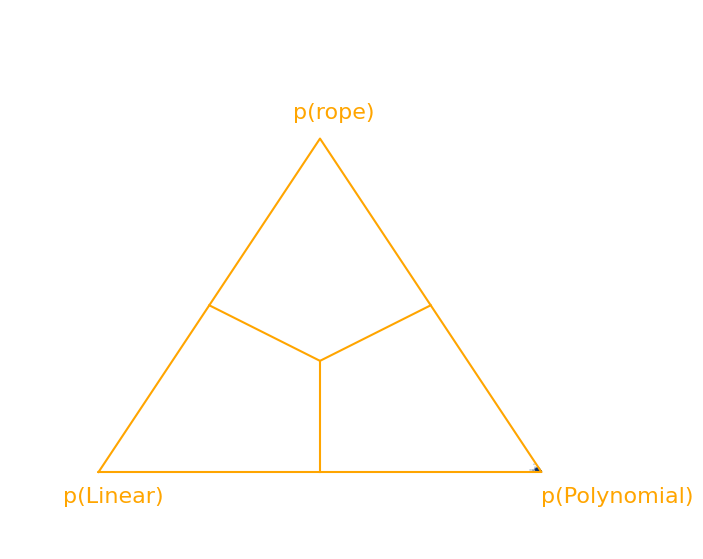

In [21]:
rope = 0.1 * cross_val_score_linear.std()
names = ['Linear', 'Polynomial']
left, within, right = bayessian_signrank(diff_linear_poly, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_linear_poly, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

P(Linear > Polynomial) = 0.0, P(rope) = 0.0, P(Polynomial > Linear) = 1.0


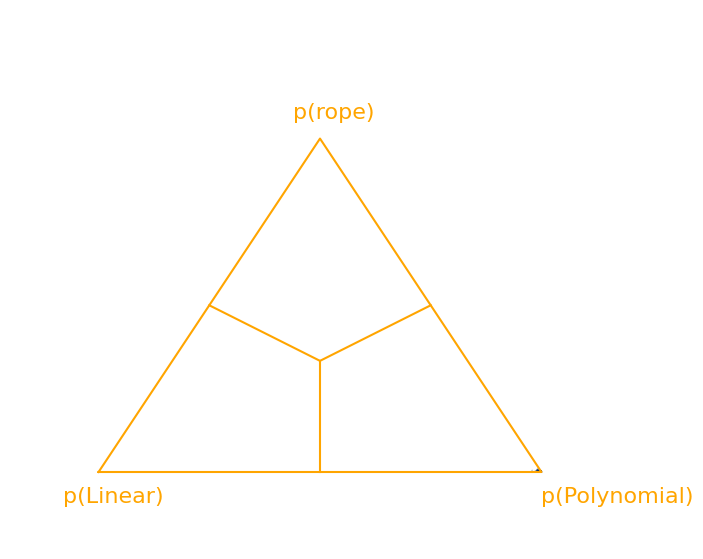

In [22]:
rope = 0.01 * cross_val_score_linear.std()
names = ['Linear', 'Polynomial']
left, within, right = bayessian_signrank(diff_linear_poly, rope=rope, verbose=True, names=['Linear', 'Polynomial'])
samples = signrank_MC(diff_linear_poly, rope=rope)
fig = plot_posterior(samples, names=['Linear', 'Polynomial'])
plt.show()

P(Linear > Polynomial) = 0.0, P(rope) = 0.0, P(Polynomial > Linear) = 1.0


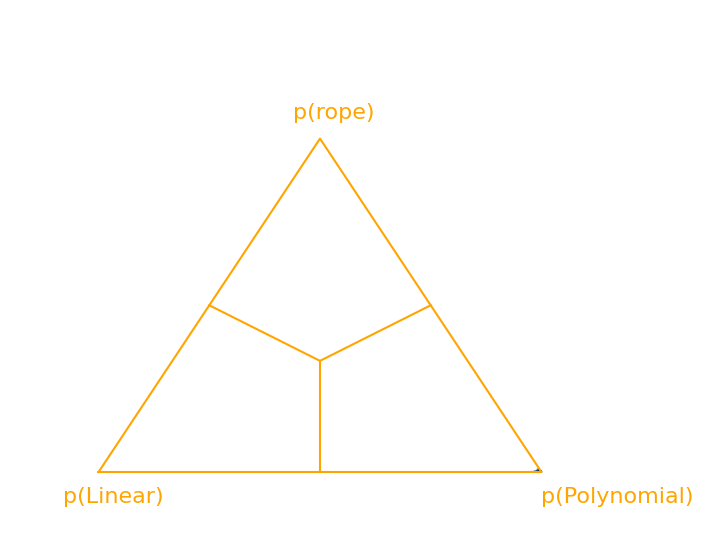

In [23]:
rope = 0.001 * cross_val_score_linear.std()
names = ['Linear', 'Polynomial']
left, within, right = bayessian_signrank(diff_linear_poly, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_linear_poly, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

###### Linear vs Bayesian

P(Linear > Bayesian) = 0.13404, P(rope) = 0.02548, P(Bayesian > Linear) = 0.84048


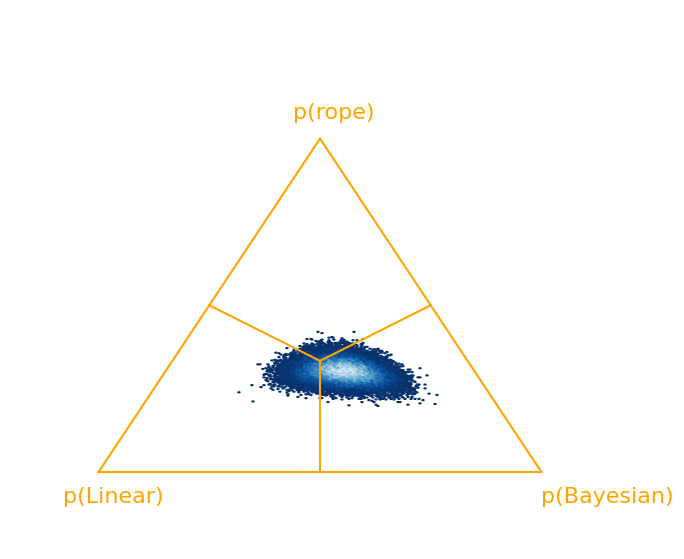

In [31]:
rope =  0.001 * cross_val_score_linear.std()
names = ['Linear', 'Bayesian']
left, within, right = bayessian_signrank(diff_linear_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_linear_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

P(Linear > Bayesian) = 0.15894, P(rope) = 0.00152, P(Bayesian > Linear) = 0.83954


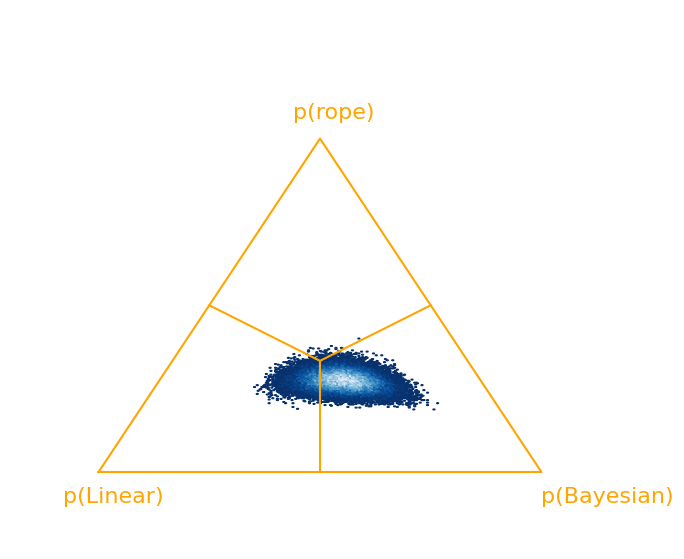

In [25]:
rope =  0.001 * cross_val_score_bayesian.std()
names = ['Linear', 'Bayesian']
left, within, right = bayessian_signrank(diff_linear_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_linear_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

P(Linear > Bayesian) = 0.1706, P(rope) = 0.0, P(Bayesian > Linear) = 0.8294


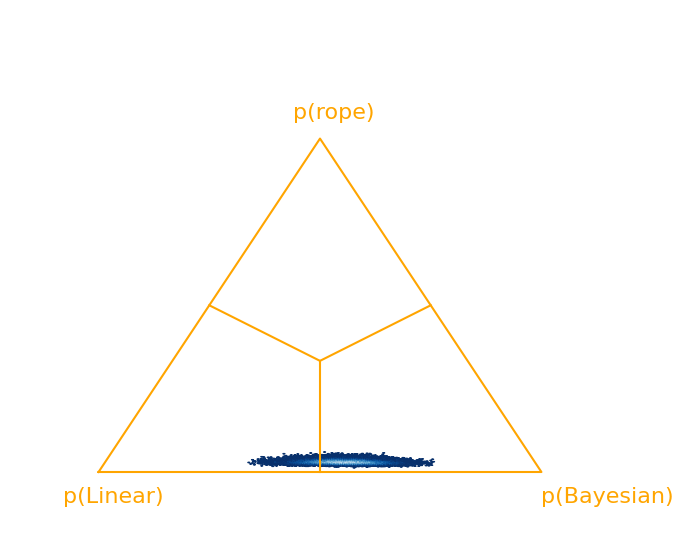

In [26]:
rope = 0.0001 * cross_val_score_linear.std()
names = ['Linear', 'Bayesian']
left, within, right = bayessian_signrank(diff_linear_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_linear_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

###### Polynomial vs Bayesian

P(Polynomial > Bayesian) = 1.0, P(rope) = 0.0, P(Bayesian > Polynomial) = 0.0


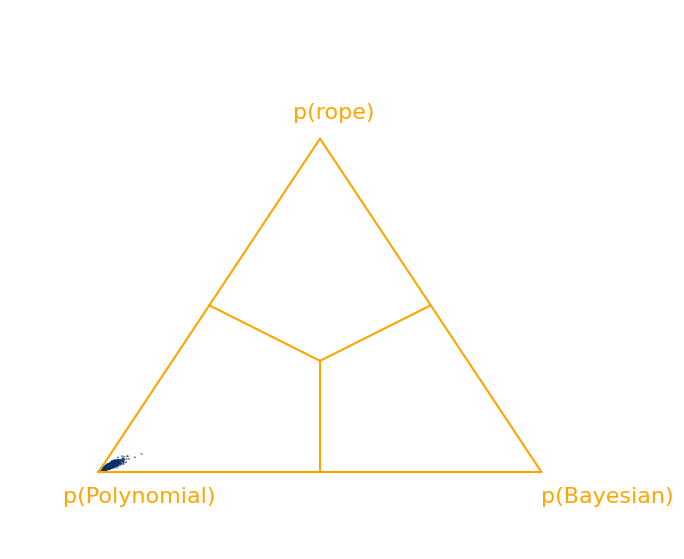

In [27]:
rope = 0.1  * cross_val_score_bayesian.std()
names = ['Polynomial', 'Bayesian']
left, within, right = bayessian_signrank(diff_poly_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_poly_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

P(Polynomial > Bayesian) = 1.0, P(rope) = 0.0, P(Bayesian > Polynomial) = 0.0


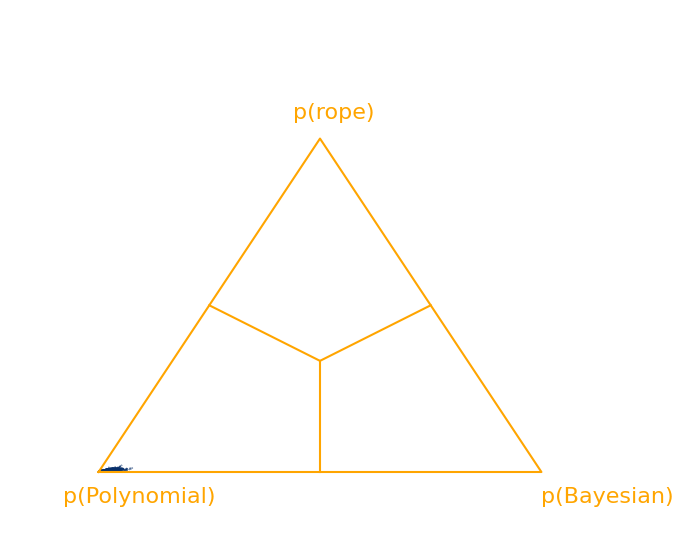

In [28]:
rope = 0.01  * cross_val_score_bayesian.std()
names = ['Polynomial', 'Bayesian']
left, within, right = bayessian_signrank(diff_poly_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_poly_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

P(Polynomial > Bayesian) = 1.0, P(rope) = 0.0, P(Bayesian > Polynomial) = 0.0


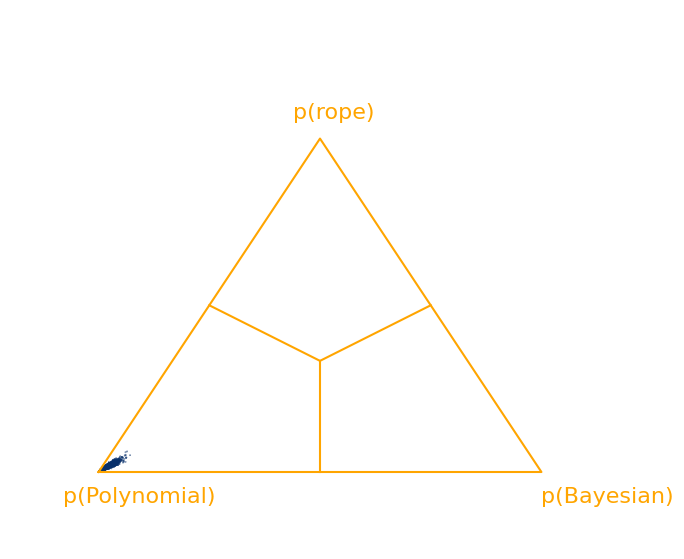

In [29]:
rope = 0.1 * cross_val_score_poly.std()
names = ['Polynomial', 'Bayesian']
left, within, right = bayessian_signrank(diff_poly_bayesian, rope=rope, verbose=True, names=names)
samples = signrank_MC(diff_poly_bayesian, rope=rope)
fig = plot_posterior(samples, names=names)
plt.show()

### Well, for certain pairs of measures, that makes sense, since each measure focuses on a different aspect of learning. For example, the TPR and the FPR are quite different, and often, good results on one yields bad results on the other. Precision and Recall also seem to tradeoff each other

## <b> Analysis of which algorithm is better/worser and for which alfa-levels </b>

### Hypothesis testing consists of stating a null hypothesis which usually is the opposite of what we wish to test (for example, classifiers A and B perform equivalently)
### We then choose a suitable statistical test and statistic that will be used to reject the null hypothesis.
### We also choose a critical region for the statistic to lie in that is extreme enough for the null hypothesis to be rejected.
### We calculate the observed test statistic from the data and check whether it lies in the critical region. If so, reject the null hypothesis. If not, we fail to reject the null hypothesis, but do not accept it either.
###### Rejecting the null hypothesis gives us some confidence in the belief that our observations did not occur merely by chance.

### So we measured at sevral alpha levels - 0.1, 0.01, 0.001, 0.0001

### So at the alpha level of - 0.1 we could say that Polynomial is better, not as 100% but it close to
### At the alpha level of - 0.01 we couldn't say strongly the same result as at level 0.1, Polynomial better
### At the alpha level of - 0.001 there is no strong decision which one is better (Bayesian has ~0.8 and Polynimial ~1)
### At the alpha level of - 0.0001 the same as level 0.001

### Hypothesis testing never constitutes a proof that our observation is valid. It provides added support for our observations. We can never be 100% sure about them.